## Classification practical

Total marks: 21

> *** Good job in general. For further improvement, you can also comment out your code more. You experiment with other ways to measure accuracies, that is good, you can still make your work stand out more from the crowd***

In [ ]:
from keras.datasets import mnist
import numpy as np
np.random.seed(137)
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import np_utils

## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## View the shape

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

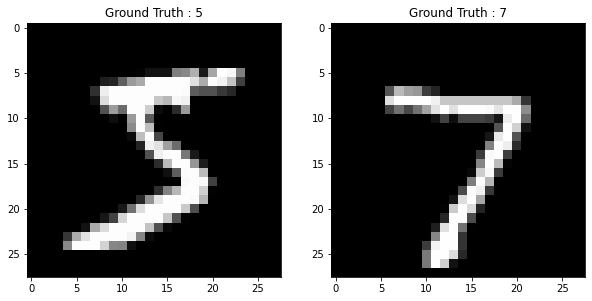

In [ ]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Task: Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 

Hint: ...reshape(...).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [ ]:
X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000,784))

> *** Good ***

## Now the data is a long vector

There are 60,000 examples for which each is a vector of length 784

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
Y_train.shape

(60000,)

## View the first example

In [ ]:
X_train[0].shape

(784,)

In [ ]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Task: Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this, we simply divide by the maximum value, in this case 255.

In [ ]:
X_train = X_train/255
X_test = X_test/255 

> *** Good ***

# checking First example after normalising

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [ ]:
Y_test[0]

7

In [ ]:
Y_train[0]

5

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10. You need to convert both the training targets and the testing targets.

In [ ]:
Y_train = np_utils.to_categorical(Y_train)# Your code here
Y_test = np_utils.to_categorical(Y_test)# Your code here

## After

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Checking the shape

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_test.shape

(10000, 10)

# creating validation data

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

# Checking the shape after making validation data

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_test.shape

(10000, 10)

In [ ]:
X_val.shape

(18000, 784)

In [ ]:
Y_val.shape

(18000, 10)

# Looking test data

In [ ]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Task: Create a neural network model

In [ ]:
def baseline():
  
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model# Your code here

## Task: Initialise the model

In [ ]:
model = baseline()# Your code here

## Task: Determine the number of trainable parameters

In [ ]:
model.summary()# Your code here

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 25)# Your code here

Epoch 1/25
1313/1313 [==============================] - 5s 3ms/step - loss: 0.8909 - accuracy: 0.7263 - val_loss: 0.4508 - val_accuracy: 0.8705
Epoch 2/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4093 - accuracy: 0.8844 - val_loss: 0.3658 - val_accuracy: 0.9002
Epoch 3/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3500 - accuracy: 0.9031 - val_loss: 0.3359 - val_accuracy: 0.9080
Epoch 4/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3222 - accuracy: 0.9096 - val_loss: 0.3191 - val_accuracy: 0.9138
Epoch 5/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3050 - accuracy: 0.9150 - val_loss: 0.3145 - val_accuracy: 0.9144
Epoch 6/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2938 - accuracy: 0.9180 - val_loss: 0.3058 - val_accuracy: 0.9173
Epoch 7/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208 - val_loss: 0.2957 - val_accuracy:

## Task: Predict on the test data

In [ ]:
prediction = model.predict(X_test)# Your code here

In [ ]:
prediction

array([[8.5558331e-24, 2.9190666e-08, 8.3705963e-04, ..., 9.9663723e-01,
        2.4929898e-11, 2.0168633e-08],
       [2.9775907e-07, 4.3873646e-04, 9.9691212e-01, ..., 1.0834511e-08,
        3.0257952e-06, 7.0753773e-14],
       [3.9595270e-05, 9.7568786e-01, 1.2046913e-02, ..., 9.4158296e-04,
        8.2342345e-03, 2.6663710e-04],
       ...,
       [9.6812992e-23, 6.8488635e-12, 4.2743320e-09, ..., 2.4026249e-05,
        3.2869284e-05, 6.8325656e-03],
       [7.8732423e-11, 3.5897822e-09, 4.1262309e-05, ..., 4.0031603e-11,
        2.2633558e-02, 2.9384799e-09],
       [6.5195636e-08, 3.8636605e-21, 8.2059312e-14, ..., 1.4002822e-19,
        1.8481262e-11, 3.0450882e-14]], dtype=float32)

In [ ]:
prediction_classes = np.argmax(prediction, axis=1)

In [ ]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Task: Compute the accuracy

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[ 951,    1,    2,    1,    1,    9,   11,    1,    2,    1],
       [   1, 1114,    4,    2,    0,    1,    2,    1,   10,    0],
       [   8,   13,  947,   19,    5,    7,   12,   11,    9,    1],
       [   2,    3,   22,  911,    0,   27,    2,   16,   17,   10],
       [   0,    0,    3,    1,  907,    2,   24,    9,    8,   28],
       [  17,    0,    5,   34,    6,  779,   16,    1,   26,    8],
       [  17,    3,    4,    0,    6,    7,  917,    0,    4,    0],
       [   1,   18,   24,   13,   10,    0,    0,  938,    1,   23],
       [   8,   13,    2,    4,    9,   33,   14,    1,  883,    7],
       [   4,    5,    0,    6,   34,    8,    1,   10,   14,  927]])

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes)

0.9274

# Creating plot

In [ ]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

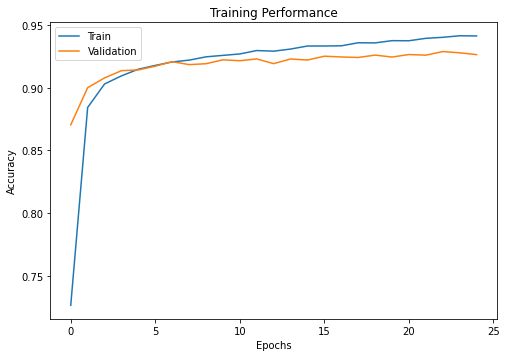

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)

> *** Good ***